# <center>Critical AI</center>
<center>ENGL 54.41</center>
<center>Dartmouth College</center>
<center>Fall 2024</center>

<pre>Created: 07/28/2021; Revised: 09/25/2024</pre>

## The Perceptron: Simple Version in NumPy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# We have a local copy of the dataset and we'll read with a Python
# package called Pandas, assigining short names to each of the columns
# that represent the four features.

df = pd.read_csv('../data/iris.data',names=["sl","sw","pl","pw","class"])                

In [4]:
# the first 100 samples are Iris-setosa and Iris-versicolor (50 of each)
y = df.iloc[0:100, 4].values             # y is the typical variable name for labels in machine learning
y = np.where(y == 'Iris-setosa', 0, 1)   # Here we are setting Iris-setosa to class 0 and Iris-versicolor to class 1
X = df.iloc[0:100, [0,1,2,3]].values     # X is the typical variable name for data in machine learning

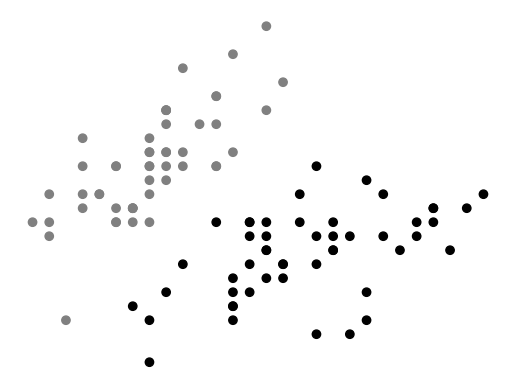

In [5]:
# Here is a visualization of just the first two dimensions of the dataset
# the gray dots are sepal length and sepal width for Iris-setosa and
# the black dots are the same for Iris-versicolor. These are plotted as
# x/y coordinates. Can you see a clear line separating these representations
# using these two features? 

plt.scatter(X[:,0], X[:,1],c=np.where(y == 0, "gray","black"))
plt.axis('off')
plt.show()

In [ ]:
# number of training iterations
epochs = 10   # how many iterations should we use? What's a reasonable number? How do we know?

# learning rate 
learning_rate = 0.01

In [ ]:
# initialize a set of weights dynamically from data (number of samples + 1)
# the additional weight is known as the bias term
weights = X.shape[1]
weights = np.zeros(weights + 1)

# these are simple weights for layer
weights.shape

In [ ]:
# Here is a simple way to view a random sample of the training data
import random
random.choices(X,k=4)

In [ ]:
# We'll create a prediction function that will return class 0 or 1
# depending on the sum of activations

def predict(input_data):
    input_data = np.array(input_data)
    
    # in some versions of the Perceptron algorithm, this is done prior to prediction
    weight_sum = np.dot(input_data, weights[1:]) + weights[0]

    # sort of self-explanatory: return class based on sums
    if weight_sum > 0:
        activation = 1
    else:
        activation = 0
    return activation

In [ ]:
# train the Perceptron on training data for both classes
# and supply labels (either 0 or 1)

# iterate through each of the training epochs
for e in range(epochs):
    # on each epoch, we update the weights with all the training data and labels
    for inputs, label in zip(X, y):
        # predict class and update weights
        prediction = predict(inputs)
        weights[1:] += learning_rate * (label - prediction) * inputs
        weights[0] += learning_rate * (label - prediction)

![Learned Hyperplane](../img/perceptron-hyperplane.png)

This is a visualization of the learned hyperplane vector from the first two weights (weights[1:2]) over a scatterplot of the data. The black line shows the values afer the final epoch.

In [ ]:
# these weights define the hyperplane learned by the Perceptron
weights

In [ ]:
# sample imaginary data (class 1 or Iris-versicolor)
predict([6.8, 3.1, 4.5, 1.2])

In [ ]:
# sample imaginary data (class 0 or Iris-setosa)
predict([4.7, 3.0, 1.6, 0.2])

## Try it!
Now try some of your own by inventing data that might belong to either class